In [1]:
import pandas as pd 
import tweepy

In [2]:
data = pd.read_csv('ps5twitter.csv')
data

,Unnamed: 0,tweet,date,city,user_location,id,link
0,0,@juanpforero @Relict_King @JUANCAORTIZ14 @GACE...,2020-11-14 15:03:23,Bogota,Bogotá,1327628199229091840,https://twitter.com/i/web/status/1327628199229...
1,1,@JUANCAORTIZ14 @GACELALEX @Relict_King alguno ...,2020-11-14 14:57:33,Bogota,Bogotá,1327626729385582592,https://twitter.com/i/web/status/1327626729385...
2,2,"@Xbox_Spain Joder, a ver cuando hay Stock. En ...",2020-11-14 12:08:16,Bogota,Málaga la Bella,1327584129215590407,https://twitter.com/i/web/status/1327584129215...
3,3,Los #oni no son problema para personas que hay...,2020-11-14 08:32:36,Bogota,Bogotá - Colombia,1327529853411876864,https://twitter.com/i/web/status/1327529853411...
4,4,MLB: Juan Soto se emociona al recibir su PS5 |...,2020-11-14 06:46:57,Bogota,Quisqueya La Bella,1327503267220385792,https://twitter.com/i/web/status/1327503267220...
...,...,...,...,...,...,...,...
195,195,@sofiamunerarp Sofía avísame por favor cuando ...,2020-11-06 19:07:57,Bogota,"bogota, colombia",1324790644225748992,https://twitter.com/i/web/status/1324790644225...
196,196,"Es viernes y el #gamer lo sabe jajajaa, que ju...",2020-11-06 19:00:14,Bogota,"Bogotá, D.C., Colombia",1324788702703505411,https://twitter.com/i/web/status/1324788702703...
197,197,Bueno aquí más información de esta guerra entr...,2020-11-06 18:29:53,Bogota,Bogota colombia,1324781065693765637,https://twitter.com/i/web/status/1324781065693...
198,198,Si pensaste que tú día o fin de semana empezó ...,2020-11-06 18:26:14,Bogota,Bogotá,1324780144276447232,https://twitter.com/i/web/status/1324780144276...


In [3]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [4]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')

data.head()

,Unnamed: 0,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions
0,0,@juanpforero @Relict_King @JUANCAORTIZ14 @GACE...,2020-11-14 15:03:23,Bogota,Bogotá,1327628199229091840,https://twitter.com/i/web/status/1327628199229...,Jajajajaja es para saber si la entrego ant...,[],[],"[@juanpforero, @Relict_King, @JUANCAORTIZ14, @..."
1,1,@JUANCAORTIZ14 @GACELALEX @Relict_King alguno ...,2020-11-14 14:57:33,Bogota,Bogotá,1327626729385582592,https://twitter.com/i/web/status/1327626729385...,alguno de ustedes sabe si es necesario tene...,[],[],"[@JUANCAORTIZ14, @GACELALEX, @Relict_King]"
2,2,"@Xbox_Spain Joder, a ver cuando hay Stock. En ...",2020-11-14 12:08:16,Bogota,Málaga la Bella,1327584129215590407,https://twitter.com/i/web/status/1327584129215...,"Joder, a ver cuando hay Stock. En Málaga es i...",[],[],[@Xbox_Spain]
3,3,Los #oni no son problema para personas que hay...,2020-11-14 08:32:36,Bogota,Bogotá - Colombia,1327529853411876864,https://twitter.com/i/web/status/1327529853411...,Los no son problema para personas que hayan s...,[https://t.co/yixKw6Q4DV],"[#oni, #DarkSouls,, #Nioh2, #ps5, #PS4]",[]
4,4,MLB: Juan Soto se emociona al recibir su PS5 |...,2020-11-14 06:46:57,Bogota,Quisqueya La Bella,1327503267220385792,https://twitter.com/i/web/status/1327503267220...,MLB: Juan Soto se emociona al recibir su PS5 |...,[https://t.co/3fjgFzgktz],[],[]


In [7]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator

vader = SentimentIntensityAnalyzer()

In [8]:
translator = Translator()
data['ing'] = data['clean'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))
data.head()

,Unnamed: 0,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,ing
0,0,@juanpforero @Relict_King @JUANCAORTIZ14 @GACE...,2020-11-14 15:03:23,Bogota,Bogotá,1327628199229091840,https://twitter.com/i/web/status/1327628199229...,Jajajajaja es para saber si la entrego ant...,[],[],"[@juanpforero, @Relict_King, @JUANCAORTIZ14, @...","Translated(src=es, dest=en, text=Hahahahaha it..."
1,1,@JUANCAORTIZ14 @GACELALEX @Relict_King alguno ...,2020-11-14 14:57:33,Bogota,Bogotá,1327626729385582592,https://twitter.com/i/web/status/1327626729385...,alguno de ustedes sabe si es necesario tene...,[],[],"[@JUANCAORTIZ14, @GACELALEX, @Relict_King]","Translated(src=es, dest=en, text=Do any of you..."
2,2,"@Xbox_Spain Joder, a ver cuando hay Stock. En ...",2020-11-14 12:08:16,Bogota,Málaga la Bella,1327584129215590407,https://twitter.com/i/web/status/1327584129215...,"Joder, a ver cuando hay Stock. En Málaga es i...",[],[],[@Xbox_Spain],"Translated(src=es, dest=en, text=Fuck, let's s..."
3,3,Los #oni no son problema para personas que hay...,2020-11-14 08:32:36,Bogota,Bogotá - Colombia,1327529853411876864,https://twitter.com/i/web/status/1327529853411...,Los no son problema para personas que hayan s...,[https://t.co/yixKw6Q4DV],"[#oni, #DarkSouls,, #Nioh2, #ps5, #PS4]",[],"Translated(src=es, dest=en, text=They are not ..."
4,4,MLB: Juan Soto se emociona al recibir su PS5 |...,2020-11-14 06:46:57,Bogota,Quisqueya La Bella,1327503267220385792,https://twitter.com/i/web/status/1327503267220...,MLB: Juan Soto se emociona al recibir su PS5 |...,[https://t.co/3fjgFzgktz],[],[],"Translated(src=es, dest=en, text=MLB: Juan Sot..."


In [9]:
data['ingles'] = data['ing'].apply(lambda valor: valor.text)
data.head()

,Unnamed: 0,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,ing,ingles
0,0,@juanpforero @Relict_King @JUANCAORTIZ14 @GACE...,2020-11-14 15:03:23,Bogota,Bogotá,1327628199229091840,https://twitter.com/i/web/status/1327628199229...,Jajajajaja es para saber si la entrego ant...,[],[],"[@juanpforero, @Relict_King, @JUANCAORTIZ14, @...","Translated(src=es, dest=en, text=Hahahahaha it...",Hahahahaha it is to know if I give it before h...
1,1,@JUANCAORTIZ14 @GACELALEX @Relict_King alguno ...,2020-11-14 14:57:33,Bogota,Bogotá,1327626729385582592,https://twitter.com/i/web/status/1327626729385...,alguno de ustedes sabe si es necesario tene...,[],[],"[@JUANCAORTIZ14, @GACELALEX, @Relict_King]","Translated(src=es, dest=en, text=Do any of you...",Do any of you know if it is necessary to have ...
2,2,"@Xbox_Spain Joder, a ver cuando hay Stock. En ...",2020-11-14 12:08:16,Bogota,Málaga la Bella,1327584129215590407,https://twitter.com/i/web/status/1327584129215...,"Joder, a ver cuando hay Stock. En Málaga es i...",[],[],[@Xbox_Spain],"Translated(src=es, dest=en, text=Fuck, let's s...","Fuck, let's see when there's stock. In Malaga ..."
3,3,Los #oni no son problema para personas que hay...,2020-11-14 08:32:36,Bogota,Bogotá - Colombia,1327529853411876864,https://twitter.com/i/web/status/1327529853411...,Los no son problema para personas que hayan s...,[https://t.co/yixKw6Q4DV],"[#oni, #DarkSouls,, #Nioh2, #ps5, #PS4]",[],"Translated(src=es, dest=en, text=They are not ...",They are not a problem for people who have suf...
4,4,MLB: Juan Soto se emociona al recibir su PS5 |...,2020-11-14 06:46:57,Bogota,Quisqueya La Bella,1327503267220385792,https://twitter.com/i/web/status/1327503267220...,MLB: Juan Soto se emociona al recibir su PS5 |...,[https://t.co/3fjgFzgktz],[],[],"Translated(src=es, dest=en, text=MLB: Juan Sot...",MLB: Juan Soto is excited to receive his PS5 |...


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [11]:
data['sentimiento'] = data['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

,Unnamed: 0,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,ing,ingles,sentimiento
0,0,@juanpforero @Relict_King @JUANCAORTIZ14 @GACE...,2020-11-14 15:03:23,Bogota,Bogotá,1327628199229091840,https://twitter.com/i/web/status/1327628199229...,Jajajajaja es para saber si la entrego ant...,[],[],"[@juanpforero, @Relict_King, @JUANCAORTIZ14, @...","Translated(src=es, dest=en, text=Hahahahaha it...",Hahahahaha it is to know if I give it before h...,0.0000
1,1,@JUANCAORTIZ14 @GACELALEX @Relict_King alguno ...,2020-11-14 14:57:33,Bogota,Bogotá,1327626729385582592,https://twitter.com/i/web/status/1327626729385...,alguno de ustedes sabe si es necesario tene...,[],[],"[@JUANCAORTIZ14, @GACELALEX, @Relict_King]","Translated(src=es, dest=en, text=Do any of you...",Do any of you know if it is necessary to have ...,0.0000
2,2,"@Xbox_Spain Joder, a ver cuando hay Stock. En ...",2020-11-14 12:08:16,Bogota,Málaga la Bella,1327584129215590407,https://twitter.com/i/web/status/1327584129215...,"Joder, a ver cuando hay Stock. En Málaga es i...",[],[],[@Xbox_Spain],"Translated(src=es, dest=en, text=Fuck, let's s...","Fuck, let's see when there's stock. In Malaga ...",-0.5423
3,3,Los #oni no son problema para personas que hay...,2020-11-14 08:32:36,Bogota,Bogotá - Colombia,1327529853411876864,https://twitter.com/i/web/status/1327529853411...,Los no son problema para personas que hayan s...,[https://t.co/yixKw6Q4DV],"[#oni, #DarkSouls,, #Nioh2, #ps5, #PS4]",[],"Translated(src=es, dest=en, text=They are not ...",They are not a problem for people who have suf...,0.3567
4,4,MLB: Juan Soto se emociona al recibir su PS5 |...,2020-11-14 06:46:57,Bogota,Quisqueya La Bella,1327503267220385792,https://twitter.com/i/web/status/1327503267220...,MLB: Juan Soto se emociona al recibir su PS5 |...,[https://t.co/3fjgFzgktz],[],[],"Translated(src=es, dest=en, text=MLB: Juan Sot...",MLB: Juan Soto is excited to receive his PS5 |...,0.3400


In [12]:
data

,Unnamed: 0,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,ing,ingles,sentimiento
0,0,@juanpforero @Relict_King @JUANCAORTIZ14 @GACE...,2020-11-14 15:03:23,Bogota,Bogotá,1327628199229091840,https://twitter.com/i/web/status/1327628199229...,Jajajajaja es para saber si la entrego ant...,[],[],"[@juanpforero, @Relict_King, @JUANCAORTIZ14, @...","Translated(src=es, dest=en, text=Hahahahaha it...",Hahahahaha it is to know if I give it before h...,0.0000
1,1,@JUANCAORTIZ14 @GACELALEX @Relict_King alguno ...,2020-11-14 14:57:33,Bogota,Bogotá,1327626729385582592,https://twitter.com/i/web/status/1327626729385...,alguno de ustedes sabe si es necesario tene...,[],[],"[@JUANCAORTIZ14, @GACELALEX, @Relict_King]","Translated(src=es, dest=en, text=Do any of you...",Do any of you know if it is necessary to have ...,0.0000
2,2,"@Xbox_Spain Joder, a ver cuando hay Stock. En ...",2020-11-14 12:08:16,Bogota,Málaga la Bella,1327584129215590407,https://twitter.com/i/web/status/1327584129215...,"Joder, a ver cuando hay Stock. En Málaga es i...",[],[],[@Xbox_Spain],"Translated(src=es, dest=en, text=Fuck, let's s...","Fuck, let's see when there's stock. In Malaga ...",-0.5423
3,3,Los #oni no son problema para personas que hay...,2020-11-14 08:32:36,Bogota,Bogotá - Colombia,1327529853411876864,https://twitter.com/i/web/status/1327529853411...,Los no son problema para personas que hayan s...,[https://t.co/yixKw6Q4DV],"[#oni, #DarkSouls,, #Nioh2, #ps5, #PS4]",[],"Translated(src=es, dest=en, text=They are not ...",They are not a problem for people who have suf...,0.3567
4,4,MLB: Juan Soto se emociona al recibir su PS5 |...,2020-11-14 06:46:57,Bogota,Quisqueya La Bella,1327503267220385792,https://twitter.com/i/web/status/1327503267220...,MLB: Juan Soto se emociona al recibir su PS5 |...,[https://t.co/3fjgFzgktz],[],[],"Translated(src=es, dest=en, text=MLB: Juan Sot...",MLB: Juan Soto is excited to receive his PS5 |...,0.3400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,@sofiamunerarp Sofía avísame por favor cuando ...,2020-11-06 19:07:57,Bogota,"bogota, colombia",1324790644225748992,https://twitter.com/i/web/status/1324790644225...,Sofía avísame por favor cuando compres el ps5...,[],[],[@sofiamunerarp],"Translated(src=es, dest=en, text=Sophia please...",Sophia please let me know when you buy the ps5...,0.3182
196,196,"Es viernes y el #gamer lo sabe jajajaa, que ju...",2020-11-06 19:00:14,Bogota,"Bogotá, D.C., Colombia",1324788702703505411,https://twitter.com/i/web/status/1324788702703...,"Es viernes y el lo sabe jajajaa, que juegan h...",[],"[#gamer, #gamers, #PS4, #PS5, #Xbox, #pcgaming...",[],"Translated(src=es, dest=en, text=It's Friday a...","It's Friday and he knows it hahaha, what are t...",0.6597
197,197,Bueno aquí más información de esta guerra entr...,2020-11-06 18:29:53,Bogota,Bogota colombia,1324781065693765637,https://twitter.com/i/web/status/1324781065693...,Bueno aquí más información de esta guerra entr...,[https://t.co/fdDmXoufiJ],"[#Xbox, #PS5]",[],"Translated(src=es, dest=en, text=Well here mor...",Well here more information about this war betw...,-0.5461
198,198,Si pensaste que tú día o fin de semana empezó ...,2020-11-06 18:26:14,Bogota,Bogotá,1324780144276447232,https://twitter.com/i/web/status/1324780144276...,Si pensaste que tú día o fin de semana empezó ...,[https://t.co/QqJyrtObwB],"[#lloros, #FUTChampions, #fifa21, #ps5, #futbol]",[@DjMaRiiO],"Translated(src=es, dest=en, text=If you though...",If you thought that your day or weekend starte...,-0.4767


In [13]:
data[['clean', 'sentimiento']].sort_values('sentimiento')

,clean,sentimiento
192,Nooooo PS5 pasa de modo standby 7 segundos des...,-0.8885
72,Que envidia de los que ya tienen la 😭😭 pront...,-0.8472
141,Star Wars Squadrons trae parche para la siguie...,-0.8364
7,"""Ridículo mundial con la PS5, no leen los CD ...",-0.8126
174,¿O sea que el día del lanzamiento de ningún a...,-0.7645
...,...,...
120,"La cuenta ""Spider-Man Shots"" comparte estas in...",0.9325
71,Inicia oficialmente la novena generación de co...,0.9340
20,"El día 22 es el cumpleaños de mi hija, el prim...",0.9387
124,Idea ganadora:\n\nMis niñas hermosas y sexosas...,0.9408


In [32]:
data.loc[192]['clean']
data.loc[124]['clean']

'Idea ganadora:\n\nMis niñas hermosas y sexosas, ninguna de ustedes va a hacer un videito haciendo el unboxing de un Xbox series x o un ps5 en tanguita o algo muy sexy? Que pasó con el emprendimiento?'

In [35]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')
sentence = Sentence(data.loc[192]['clean'])


classifier.predict(sentence, multi_class_prob=False)
l = sentence.labels

l[0].value, l[0].score

2020-11-18 11:42:04,955 loading file C:\Users\Home\.flair\models\sentiment-en-mix-distillbert_3.1.pt


('NEGATIVE', 0.7641725540161133)

In [33]:
sentence = Sentence(data.loc[24]['clean'])


classifier.predict(sentence, multi_class_prob=False)
l = sentence.labels

l[0].value, l[0].score

('NEGATIVE', 0.6797538995742798)

In [36]:
sentence = Sentence(data.loc[124]['clean'])


classifier.predict(sentence, multi_class_prob=False)
l = sentence.labels

l[0].value, l[0].score

('POSITIVE', 0.7897798418998718)

In [41]:
data

,Unnamed: 0,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,ing,ingles,sentimiento
0,0,@juanpforero @Relict_King @JUANCAORTIZ14 @GACE...,2020-11-14 15:03:23,Bogota,Bogotá,1327628199229091840,https://twitter.com/i/web/status/1327628199229...,Jajajajaja es para saber si la entrego ant...,[],[],"[@juanpforero, @Relict_King, @JUANCAORTIZ14, @...","Translated(src=es, dest=en, text=Hahahahaha it...",Hahahahaha it is to know if I give it before h...,0.0000
1,1,@JUANCAORTIZ14 @GACELALEX @Relict_King alguno ...,2020-11-14 14:57:33,Bogota,Bogotá,1327626729385582592,https://twitter.com/i/web/status/1327626729385...,alguno de ustedes sabe si es necesario tene...,[],[],"[@JUANCAORTIZ14, @GACELALEX, @Relict_King]","Translated(src=es, dest=en, text=Do any of you...",Do any of you know if it is necessary to have ...,0.0000
2,2,"@Xbox_Spain Joder, a ver cuando hay Stock. En ...",2020-11-14 12:08:16,Bogota,Málaga la Bella,1327584129215590407,https://twitter.com/i/web/status/1327584129215...,"Joder, a ver cuando hay Stock. En Málaga es i...",[],[],[@Xbox_Spain],"Translated(src=es, dest=en, text=Fuck, let's s...","Fuck, let's see when there's stock. In Malaga ...",-0.5423
3,3,Los #oni no son problema para personas que hay...,2020-11-14 08:32:36,Bogota,Bogotá - Colombia,1327529853411876864,https://twitter.com/i/web/status/1327529853411...,Los no son problema para personas que hayan s...,[https://t.co/yixKw6Q4DV],"[#oni, #DarkSouls,, #Nioh2, #ps5, #PS4]",[],"Translated(src=es, dest=en, text=They are not ...",They are not a problem for people who have suf...,0.3567
4,4,MLB: Juan Soto se emociona al recibir su PS5 |...,2020-11-14 06:46:57,Bogota,Quisqueya La Bella,1327503267220385792,https://twitter.com/i/web/status/1327503267220...,MLB: Juan Soto se emociona al recibir su PS5 |...,[https://t.co/3fjgFzgktz],[],[],"Translated(src=es, dest=en, text=MLB: Juan Sot...",MLB: Juan Soto is excited to receive his PS5 |...,0.3400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,@sofiamunerarp Sofía avísame por favor cuando ...,2020-11-06 19:07:57,Bogota,"bogota, colombia",1324790644225748992,https://twitter.com/i/web/status/1324790644225...,Sofía avísame por favor cuando compres el ps5...,[],[],[@sofiamunerarp],"Translated(src=es, dest=en, text=Sophia please...",Sophia please let me know when you buy the ps5...,0.3182
196,196,"Es viernes y el #gamer lo sabe jajajaa, que ju...",2020-11-06 19:00:14,Bogota,"Bogotá, D.C., Colombia",1324788702703505411,https://twitter.com/i/web/status/1324788702703...,"Es viernes y el lo sabe jajajaa, que juegan h...",[],"[#gamer, #gamers, #PS4, #PS5, #Xbox, #pcgaming...",[],"Translated(src=es, dest=en, text=It's Friday a...","It's Friday and he knows it hahaha, what are t...",0.6597
197,197,Bueno aquí más información de esta guerra entr...,2020-11-06 18:29:53,Bogota,Bogota colombia,1324781065693765637,https://twitter.com/i/web/status/1324781065693...,Bueno aquí más información de esta guerra entr...,[https://t.co/fdDmXoufiJ],"[#Xbox, #PS5]",[],"Translated(src=es, dest=en, text=Well here mor...",Well here more information about this war betw...,-0.5461
198,198,Si pensaste que tú día o fin de semana empezó ...,2020-11-06 18:26:14,Bogota,Bogotá,1324780144276447232,https://twitter.com/i/web/status/1324780144276...,Si pensaste que tú día o fin de semana empezó ...,[https://t.co/QqJyrtObwB],"[#lloros, #FUTChampions, #fifa21, #ps5, #futbol]",[@DjMaRiiO],"Translated(src=es, dest=en, text=If you though...",If you thought that your day or weekend starte...,-0.4767


In [43]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

data['emojis'] = data['clean'].apply(lambda text: get_emojis(text))

In [46]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [47]:
from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(data.emojis.values,[])).keys(),Counter(sum(data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head()

,emoji,cnt
12,❤️,7
9,🥺,6
19,😭,6
25,🙏🏽,6
33,👇🏽,5


In [48]:
trace = go.Bar(x=temp_emojis.emoji.values[:15],
               y=temp_emojis.cnt.values[:15])

layout = go.Layout(title='Emojis más usados')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [50]:
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

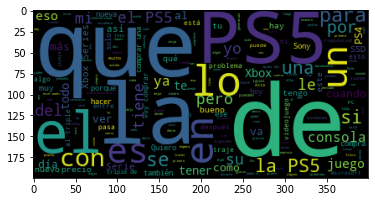

In [52]:
palabras = data.clean.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)
 
plt.imshow(wordcloud)
plt.show()

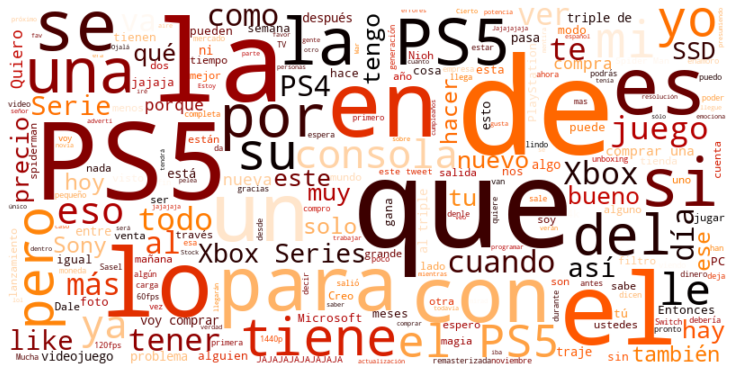

In [53]:
wordcloud = WordCloud(width=800, height=400,

                      max_font_size=150, max_words=250,

                      background_color='white', colormap='gist_heat',

                      stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

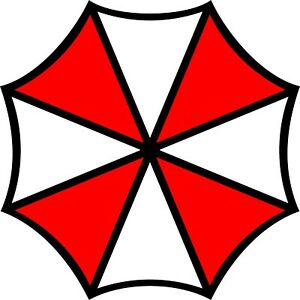

In [83]:
PS5 = PIL.Image.open("umbrella.png")

display(PS5)

In [84]:
mask = np.array(PS5)

mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

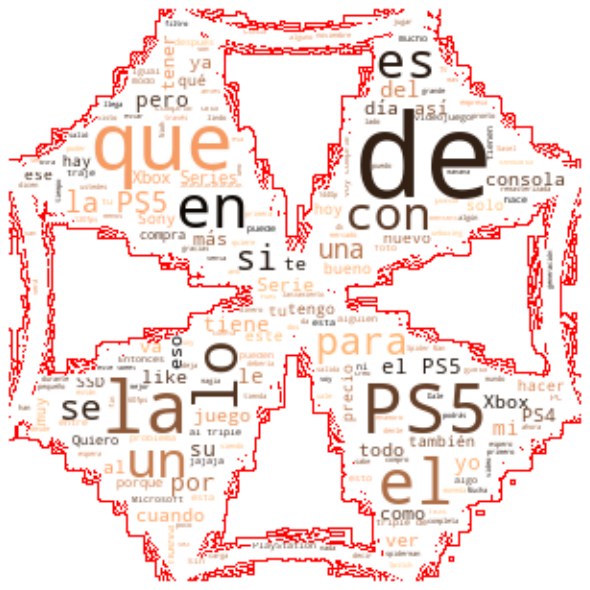

In [86]:
palabras = data.clean.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,

                      max_font_size=150, max_words=250,

                      background_color='white', colormap='copper_r',

                      stopwords=stopwords,

                      mask=mask, contour_width=0.5, contour_color='red').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
wordcloud.to_file("umbrella.png")
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()